In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Pulling in the data sets we need 
folder = 'Data/Mens Data/'
Seeds = pd.read_csv(folder+'MNCAATourneySeeds.csv')
MasseyOrdinals = pd.read_csv(folder+'MMasseyOrdinals.csv')
TourneyCompact = pd.read_csv(folder+'MNCAATourneyCompactResults.csv')
RegularDetail = pd.read_csv(folder+'MRegularSeasonDetailedResults.csv')

In [3]:
#Massey Ordinals Cleaning
#drop Ranking Day Number, we'll just average for a season
#Also averaging all of the ordinals, so system name (name of the measurement) is dropped as well
MasseyOrdinals = MasseyOrdinals.drop(['RankingDayNum','SystemName'],axis=1)

In [4]:
MasseyOrdinals = MasseyOrdinals.groupby(['Season','TeamID']).last().reset_index() #grouping by these three and averaging the 
#OrdinalRank for the entire season for a team
display(MasseyOrdinals)

,Season,TeamID,OrdinalRank
0,2003,1102,156
1,2003,1103,161
2,2003,1104,28
3,2003,1105,299
4,2003,1106,256
...,...,...,...
7260,2023,1473,346
7261,2023,1474,168
7262,2023,1475,255
7263,2023,1476,288


In [5]:
#Building a winners data frame and a losers data frame 
WinTeams = pd.DataFrame()
LoseTeams = pd.DataFrame()
columns = ['Season', 'WTeamID','LTeamID', 'Points','OppPoints',
       'Loc', 'NumOT', 'FGM', 'FGA', 'FGM3', 'FGA3', 'FTM', 'FTA',
       'OR', 'DR', 'Ast', 'TO', 'Stl', 'Blk', 'PF', 'OppFGM', 'OppFGA',
       'OppFGM3', 'OppFGA3', 'OppFTM', 'OppFTA', 'OppOR', 'OppDR', 'OppAst', 'OppTO',
       'OppStl', 'OppBlk', 'OppPF']
WinTeams[columns] = RegularDetail[['Season','WTeamID','LTeamID', 'WScore', 'LScore',
       'WLoc', 'NumOT', 'WFGM', 'WFGA', 'WFGM3', 'WFGA3', 'WFTM', 'WFTA',
       'WOR', 'WDR', 'WAst', 'WTO', 'WStl', 'WBlk', 'WPF', 'LFGM', 'LFGA',
       'LFGM3', 'LFGA3', 'LFTM', 'LFTA', 'LOR', 'LDR', 'LAst', 'LTO',
       'LStl', 'LBlk', 'LPF']]

WinTeams['Wins'] = 1
WinTeams['Losses'] = 0



LoseTeams[columns] = RegularDetail[['Season','LTeamID','WTeamID', 'LScore', 'WScore',
       'WLoc', 'NumOT', 'LFGM', 'LFGA', 'LFGM3', 'LFGA3', 'LFTM', 'LFTA',
       'LOR', 'LDR', 'LAst', 'LTO', 'LStl', 'LBlk', 'LPF', 'WFGM', 'WFGA',
       'WFGM3', 'WFGA3', 'WFTM', 'WFTA', 'WOR', 'WDR', 'WAst', 'WTO',
       'WStl', 'WBlk', 'WPF']]

def change_loc(loc):
    if loc == 'H':
        return 'A'
    elif loc == 'A':
        return 'H'
    else:
        return 'N'

LoseTeams['Loc'] = LoseTeams['Loc'].apply(change_loc)

LoseTeams['Wins'] = 0
LoseTeams['Losses'] = 1

In [6]:
#Concatanating the winning and losing data frames  

WinLoseTeams = pd.concat([WinTeams,LoseTeams])

In [7]:
#and then adding in the ordinals for the winners and losers

WinLoseTeams = WinLoseTeams.merge(MasseyOrdinals,left_on=['Season','WTeamID'],right_on=['Season','TeamID']).merge(MasseyOrdinals,left_on=['Season','LTeamID'],right_on=['Season','TeamID'])
                                                                                                                                         
display(WinLoseTeams)                                                                                                                               
                                                                                                                                         

,Season,WTeamID,LTeamID,Points,OppPoints,Loc,NumOT,FGM,FGA,FGM3,...,OppTO,OppStl,OppBlk,OppPF,Wins,Losses,TeamID_x,OrdinalRank_x,TeamID_y,OrdinalRank_y
0,2003,1104,1328,68,62,N,0,27,58,3,...,18,9,2,20,1,0,1104,28,1328,16
1,2003,1400,1328,67,61,H,0,25,64,5,...,14,5,3,20,1,0,1400,15,1328,16
2,2003,1400,1328,76,71,A,0,27,50,6,...,9,8,6,23,1,0,1400,15,1328,16
3,2003,1242,1328,70,77,A,0,21,61,5,...,13,6,6,26,0,1,1242,5,1328,16
4,2003,1304,1328,51,76,A,0,21,53,1,...,12,7,7,15,0,1,1304,184,1328,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215263,2023,1149,1219,73,81,A,0,25,58,10,...,9,6,5,17,0,1,1149,332,1219,269
215264,2023,1423,1219,85,82,H,0,24,54,10,...,11,6,2,26,1,0,1423,79,1219,269
215265,2023,1342,1219,56,64,A,0,20,53,7,...,16,9,9,21,0,1,1342,359,1219,269
215266,2023,1342,1219,69,71,H,0,21,46,8,...,10,15,3,21,0,1,1342,359,1219,269


In [8]:
#Dropping columns
WinLoseTeams = WinLoseTeams.drop(['TeamID_x','TeamID_y','LTeamID'],axis=1)
WinLoseTeams = WinLoseTeams.rename(columns={'WTeamID':'TeamID','OrdinalRank_x':'OrdinalRank','OrdinalRank_y':'OppOrdinalRank'})
WinLoseTeams = WinLoseTeams[WinLoseTeams['Season']>=2003].reset_index(drop=True)
display(WinLoseTeams)


,Season,TeamID,Points,OppPoints,Loc,NumOT,FGM,FGA,FGM3,FGA3,...,OppDR,OppAst,OppTO,OppStl,OppBlk,OppPF,Wins,Losses,OrdinalRank,OppOrdinalRank
0,2003,1104,68,62,N,0,27,58,3,14,...,22,8,18,9,2,20,1,0,28,16
1,2003,1400,67,61,H,0,25,64,5,14,...,25,5,14,5,3,20,1,0,15,16
2,2003,1400,76,71,A,0,27,50,6,11,...,19,16,9,8,6,23,1,0,15,16
3,2003,1242,70,77,A,0,21,61,5,14,...,29,9,13,6,6,26,0,1,5,16
4,2003,1304,51,76,A,0,21,53,1,12,...,28,19,12,7,7,15,0,1,184,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215263,2023,1149,73,81,A,0,25,58,10,21,...,23,19,9,6,5,17,0,1,332,269
215264,2023,1423,85,82,H,0,24,54,10,23,...,23,11,11,6,2,26,1,0,79,269
215265,2023,1342,56,64,A,0,20,53,7,19,...,24,11,16,9,9,21,0,1,359,269
215266,2023,1342,69,71,H,0,21,46,8,15,...,20,11,10,15,3,21,0,1,359,269


In [9]:
#aggregating by team and season
combinedTeams = WinLoseTeams.groupby(['Season','TeamID']).agg({
    'Points': 'sum',
    'OppPoints': 'sum',
    'Wins': 'sum',
    'Losses': 'sum',
    'NumOT': 'sum',
    'FGM': 'sum',
    'FGA': 'sum',
    'FGM3': 'sum',
    'FGA3': 'sum',
    'FTM': 'sum',
    'FTA': 'sum',
    'OR': 'sum',
    'DR': 'sum',
    'Ast': 'sum',
    'TO': 'sum',
    'Stl': 'sum',
    'Blk': 'sum',
    'PF': 'sum',
    'OppFGM': 'sum',
    'OppFGA': 'sum',
    'OppFGM3': 'sum',
    'OppFGA3': 'sum',
    'OppFTM': 'sum',
    'OppFTA': 'sum',
    'OppOR': 'sum',
    'OppDR': 'sum',
    'OppAst': 'sum',
    'OppTO': 'sum',
    'OppStl': 'sum',
    'OppBlk': 'sum',
    'OppPF': 'sum',
    'OrdinalRank':'mean',
    'OppOrdinalRank':'mean'
}) 

combinedTeams['NumGames'] = combinedTeams['Wins']+combinedTeams['Losses']
#combinedTeams = combinedTeams.reset_index()
display(combinedTeams.columns.values)


array(['Points', 'OppPoints', 'Wins', 'Losses', 'NumOT', 'FGM', 'FGA',
       'FGM3', 'FGA3', 'FTM', 'FTA', 'OR', 'DR', 'Ast', 'TO', 'Stl',
       'Blk', 'PF', 'OppFGM', 'OppFGA', 'OppFGM3', 'OppFGA3', 'OppFTM',
       'OppFTA', 'OppOR', 'OppDR', 'OppAst', 'OppTO', 'OppStl', 'OppBlk',
       'OppPF', 'OrdinalRank', 'OppOrdinalRank', 'NumGames'], dtype=object)

In [10]:
RegularSeasonInput = pd.DataFrame()

#RegularSeasonInput['Season'] = combinedTeams['Season']
#RegularSeasonInput['TeamID'] = combinedTeams['TeamID']


RegularSeasonInput['WinRatio'] = combinedTeams['Wins']/combinedTeams['NumGames']
RegularSeasonInput['PointsPerGame'] = combinedTeams['Points']/combinedTeams['NumGames']
RegularSeasonInput['PointsAllowedPerGame'] = combinedTeams['OppPoints']/combinedTeams['NumGames']
RegularSeasonInput['PointsRatio'] = combinedTeams['Points']/combinedTeams['OppPoints']
RegularSeasonInput['OTsPerGame'] = combinedTeams['NumOT']/combinedTeams['NumGames']

RegularSeasonInput['FGPerGame'] = combinedTeams['FGM']/combinedTeams['NumGames']
RegularSeasonInput['FGRatio'] = combinedTeams['FGM']/combinedTeams['FGA']
RegularSeasonInput['FGAllowedPerGame'] = combinedTeams['OppFGM']/combinedTeams['NumGames']

RegularSeasonInput['FG3PerGame'] = combinedTeams['FGM3']/combinedTeams['NumGames']
RegularSeasonInput['FG3Ratio'] = combinedTeams['FGM3']/combinedTeams['FGA']
RegularSeasonInput['FGA3AllowedPerGame'] = combinedTeams['OppFGM3']/combinedTeams['NumGames']

RegularSeasonInput['FTPerGame'] = combinedTeams['FTM']/combinedTeams['NumGames']
RegularSeasonInput['FTRatio'] = combinedTeams['FTM']/combinedTeams['FTA']
RegularSeasonInput['FTAllowedPerGame'] = combinedTeams['OppFTM']/combinedTeams['NumGames']

RegularSeasonInput['ORRatio'] = combinedTeams['OR']/(combinedTeams['OR']+combinedTeams['OppDR'])
RegularSeasonInput['DRRatio'] = combinedTeams['DR']/(combinedTeams['DR']+combinedTeams['OppOR'])

RegularSeasonInput['AstPerGame'] = combinedTeams['Ast']/combinedTeams['NumGames']

RegularSeasonInput['TOPerGame'] = combinedTeams['TO']/combinedTeams['NumGames']
RegularSeasonInput['StlPerGame'] = combinedTeams['Stl']/combinedTeams['NumGames']
RegularSeasonInput['BlkPerGame'] = combinedTeams['Blk']/combinedTeams['NumGames']
RegularSeasonInput['PFPerGame'] = combinedTeams['PF']/combinedTeams['NumGames']

RegularSeasonInput['OppTOPerGame'] = combinedTeams['OppTO']/combinedTeams['NumGames']
RegularSeasonInput['OppStlPerGame'] = combinedTeams['OppStl']/combinedTeams['NumGames']
RegularSeasonInput['OppBlkPerGame'] = combinedTeams['OppBlk']/combinedTeams['NumGames']
RegularSeasonInput['OppPFPerGame'] = combinedTeams['OppPF']/combinedTeams['NumGames']

display(RegularSeasonInput)


WinRatio  PointsPerGame  PointsAllowedPerGame  PointsRatio  \
Season TeamID                                                               
2003   1102    0.428571      57.250000             57.000000     1.004386   
       1103    0.481481      78.777778             78.148148     1.008057   
       1104    0.607143      69.285714             65.000000     1.065934   
       1105    0.269231      71.769231             76.653846     0.936277   
       1106    0.464286      63.607143             63.750000     0.997759   
...                 ...            ...                   ...          ...   
2023   1473    0.275862      67.620690             76.068966     0.888939   
       1474    0.500000      75.633333             75.533333     1.001324   
       1475    0.448276      75.827586             76.758621     0.987871   
       1476    0.433333      66.133333             70.400000     0.939394   
       1477    0.375000      70.656250             74.218750     0.952000   

               OTsPerGame  FGPerGame   FGRatio  FGAllowedPerGame  FG3PerGame  \
Season TeamID                                                                  
2003   1102      0.000000  19.142857  0.481149         19.285714    7.821429   
       1103      0.296296  27.148148  0.486074         27.777778    5.444444   
       1104      0.035714  24.035714  0.420362         23.250000    6.357143   
       1105      0.153846  24.384615  0.395755         27.000000    7.576923   
       1106      0.035714  23.428571  0.423773         21.714286    6.107143   
...                   ...        ...       ...               ...         ...   
2023   1473      0.172414  24.206897  0.423402         27.172414    7.379310   
       1474      0.000000  25.666667  0.435520         28.300000    9.033333   
       1475      0.103448  26.172414  0.426884         25.896552    9.551724   
       1476      0.100000  22.900000  0.436745         25.366667    7.533333   
       1477      0.156250  25.593750  0.451488         26.093750    8.250000   

               FG3Ratio  ...   DRRatio  AstPerGame  TOPerGame  StlPerGame  \
Season TeamID            ...                                                
2003   1102    0.196589  ...  0.636486   13.000000  11.428571    5.964286   
       1103    0.097480  ...  0.623407   15.222222  12.629630    7.259259   
       1104    0.111181  ...  0.687179   12.107143  13.285714    6.607143   
       1105    0.122971  ...  0.636653   14.538462  18.653846    9.307692   
       1106    0.110465  ...  0.678173   11.678571  17.035714    8.357143   
...                 ...  ...       ...         ...        ...         ...   
2023   1473    0.129071  ...  0.707135   11.068966  12.896552    5.896552   
       1474    0.153281  ...  0.754912   13.066667  11.900000    5.933333   
       1475    0.155793  ...  0.766773   12.172414  12.448276    6.655172   
       1476    0.143675  ...  0.701973   11.900000  12.800000    6.966667   
       1477    0.145535  ...  0.721925   13.843750  12.437500    5.562500   

               BlkPerGame  PFPerGame  OppTOPerGame  OppStlPerGame  \
Season TeamID                                                       
2003   1102      1.785714  18.750000     12.964286       5.428571   
       1103      2.333333  19.851852     15.333333       6.407407   
       1104      3.785714  18.035714     13.857143       5.535714   
       1105      2.076923  20.230769     18.807692       9.384615   
       1106      3.142857  18.178571     15.071429       8.785714   
...                   ...        ...           ...            ...   
2023   1473      3.413793  16.413793     11.931034       7.275862   
       1474      2.266667  16.133333     10.333333       6.466667   
       1475      2.275862  18.655172     11.517241       6.137931   
       1476      2.833333  15.133333     12.900000       6.966667   
       1477      2.875000  18.750000     11.625000       6.406250   

               OppBlkPerGame  OppPFPerGame  
Season TeamID              

In [11]:
seed_dict = Seeds.set_index(['Season', 'TeamID'])

TourneyInput = pd.DataFrame()

winIDs = TourneyCompact['WTeamID']
loseIDs = TourneyCompact['LTeamID']
season = TourneyCompact['Season']

winners = pd.DataFrame()
winners[['Season','Team1','Team2']] = TourneyCompact[['Season','WTeamID','LTeamID']]
winners['Result'] = 1
losers = pd.DataFrame()
losers[['Season','Team1','Team2']] = TourneyCompact[['Season','LTeamID','WTeamID']]
losers['Result'] = 0

TourneyInput = pd.concat([winners,losers])
TourneyInput = TourneyInput[TourneyInput['Season']>=2003].reset_index(drop=True)

team1seeds = []
team2seeds = []

for x in range(len(TourneyInput)):
    idx = (TourneyInput['Season'][x], TourneyInput['Team1'][x])
    seed = seed_dict.loc[idx].values[0]
    if len(seed) == 4:
        seed = int(seed[1:-1])
    else: 
        seed = int(seed[1:])
    team1seeds.append(seed)
    
    idx = (TourneyInput['Season'][x], TourneyInput['Team2'][x])
    seed = seed_dict.loc[idx].values[0]
    if len(seed) == 4:
        seed = int(seed[1:-1])
    else: 
        seed = int(seed[1:])
    team2seeds.append(seed)

TourneyInput['Team1Seed'] = team1seeds
TourneyInput['Team2Seed'] = team2seeds

    
display(TourneyInput)

,Season,Team1,Team2,Result,Team1Seed,Team2Seed
0,2003,1421,1411,1,16,16
1,2003,1112,1436,1,1,16
2,2003,1113,1272,1,10,7
3,2003,1141,1166,1,11,6
4,2003,1143,1301,1,8,9
...,...,...,...,...,...,...
2617,2023,1243,1194,0,3,9
2618,2023,1166,1361,0,6,5
2619,2023,1274,1163,0,5,4
2620,2023,1194,1361,0,9,5


In [12]:
outscores = []
for x in range(len(TourneyInput)):
    idx = (TourneyInput['Season'][x], TourneyInput['Team1'][x])
    team1score = RegularSeasonInput.loc[idx]
    team1score['Seed'] = TourneyInput['Team1Seed'][x]
    idx = (TourneyInput['Season'][x], TourneyInput['Team2'][x])
    team2score = RegularSeasonInput.loc[idx]
    team2score['Seed'] = TourneyInput['Team2Seed'][x]
    
    outscore = team1score - team2score
    outscore['Season'] = TourneyInput['Season'][x]
    outscore['Result'] = TourneyInput['Result'][x]
    outscores.append(outscore)
    
outscores = pd.DataFrame(outscores)
display(outscores)

,WinRatio,PointsPerGame,PointsAllowedPerGame,PointsRatio,OTsPerGame,FGPerGame,FGRatio,FGAllowedPerGame,FG3PerGame,FG3Ratio,...,StlPerGame,BlkPerGame,PFPerGame,OppTOPerGame,OppStlPerGame,OppBlkPerGame,OppPFPerGame,Seed,Season,Result
0,-0.151724,-1.593103,7.614943,-0.120072,0.139080,-0.354023,-0.018262,2.126437,0.549425,0.006789,...,0.635632,0.766667,0.803448,-1.505747,0.827586,1.641379,-2.943678,0.0,2003.0,1.0
1,0.237685,17.421182,7.112069,0.139285,0.002463,5.493842,0.016969,3.598522,1.759852,0.012621,...,1.602217,1.248768,1.853448,3.857143,-1.139163,-1.262315,4.140394,-15.0,2003.0,1.0
2,-0.172414,1.448276,3.344828,-0.033801,0.034483,0.931034,0.040251,1.517241,-3.000000,-0.046364,...,-2.172414,-0.827586,0.655172,0.448276,-1.275862,0.758621,2.931034,3.0,2003.0,1.0
3,-0.085684,0.102403,8.908046,-0.148414,-0.030303,-2.076280,0.005763,2.466040,-1.142111,-0.009132,...,-1.290491,-0.454545,3.692790,-0.991641,2.114943,-0.092999,2.295716,5.0,2003.0,1.0
4,0.124138,2.082759,1.758621,0.003015,0.070115,3.011494,0.009399,1.945977,-1.552874,-0.040156,...,-1.214943,-0.273563,-1.563218,0.297701,-1.502299,-0.316092,-0.229885,-1.0,2003.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2617,-0.187500,-2.656250,3.750000,-0.103516,0.062500,-1.718750,-0.014812,0.468750,-2.593750,-0.039707,...,1.187500,0.250000,1.843750,2.156250,1.843750,1.500000,1.843750,-6.0,2023.0,0.0
2618,-0.176136,5.292614,4.672348,0.001005,-0.001894,2.421402,0.025867,3.733902,2.096591,0.031466,...,-1.882576,0.463068,-3.348485,-2.641098,-0.130682,-0.089015,-2.370265,1.0,2023.0,0.0
2619,0.023674,0.951705,7.094697,-0.105477,0.031250,1.362689,0.025980,4.603220,-1.406250,-0.022566,...,0.798295,-1.597538,-3.714962,-0.479167,-0.697917,0.402462,-2.301136,1.0,2023.0,0.0
2620,0.093750,6.812500,1.468750,0.079202,0.000000,2.812500,0.026823,0.812500,2.906250,0.043237,...,-0.625000,-1.187500,-0.656250,-0.062500,-0.687500,-0.531250,-1.468750,4.0,2023.0,0.0


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_outscores = outscores[outscores["Season"] != 2023] # Training data includes all seasons except 2023
test_outscores = outscores[outscores["Season"] == 2023] # Testing data includes only the 2023 season
train_outscores = train_outscores.drop(["Season"],axis = 1)
test_outscores = test_outscores.drop(["Season"],axis = 1)

# Split the training and testing data into features (X) and labels (y)
X_train = train_outscores.drop(["Result"], axis=1) 
y_train = train_outscores["Result"]

X_test = test_outscores.drop(["Result"], axis=1)
y_test = test_outscores["Result"]


In [14]:
import numpy as np
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)
y_train = np.array(y_train)

In [15]:
# Train the model using the training data
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train)

# Test your model using the testing data
y_pred = rf.predict(X_test_scaled)

[0.07482107 0.07349991 0.12803164 0.06367677 0.07914236 0.06584419
 0.06553389 0.05754893 0.05795679 0.06289347 0.06170183 0.06389983
 0.06961394 0.07583538]


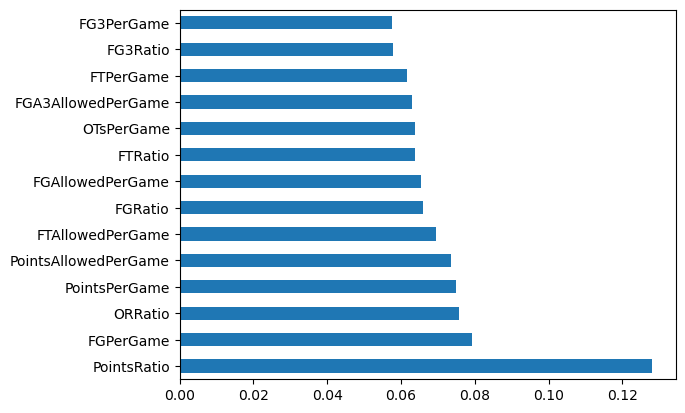

In [16]:
import pandas as pd
import numpy as np
data = train_outscores
X = data.iloc[:,1:15]  #independent columns
y = data.iloc[:,-1]    #target column 
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [17]:
from sklearn.ensemble import RandomForestClassifier 

model = RandomForestClassifier(random_state=1)
model = model.fit(X_train_scaled,y_train)
model.score(X_test_scaled,y_test)

0.626984126984127

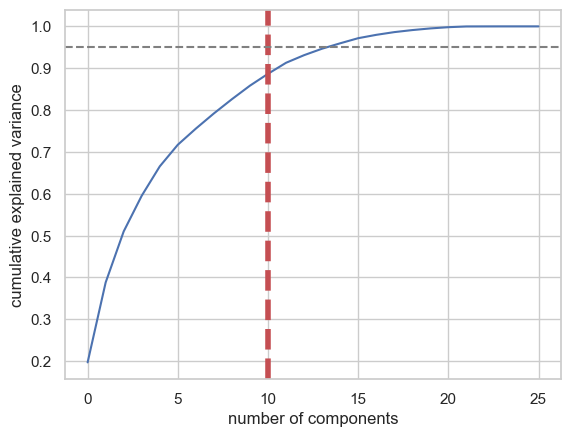

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.197145,0.197145
1,0.388145,0.191001
2,0.510047,0.121902
3,0.595391,0.085344
4,0.665475,0.070084
5,0.717137,0.051662
6,0.755698,0.038561
7,0.791969,0.036271
8,0.826013,0.034044
9,0.858338,0.032325


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
pca_test = PCA(n_components=26)
pca_test.fit(X_train_scaled)
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=10, ymin=0, ymax=1)
plt.axhline(y=0.95, color='grey', linestyle='--')
display(plt.show())
evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(20))

In [26]:
pca = PCA(n_components=18)
pca.fit(X_train_scaled)
X_train_scaled_pca = pca.transform(X_train_scaled)
X_test_scaled_pca = pca.transform(X_test_scaled)
X_train_scaled_pca_df = pd.DataFrame(X_train_scaled_pca, columns=[f"PC{i}" for i in range(1, 19)])

# Display the DataFrame
display(X_train_scaled)
display(X_train_scaled_pca_df)


array([[-1.04015882, -0.21751494,  1.19755599, ...,  1.85383736,
        -1.42915905,  0.        ],
       [ 1.62946958,  2.37860722,  1.11847211, ..., -1.42570775,
         2.01016598, -2.00051302],
       [-1.18199866,  0.19774085,  0.52602082, ...,  0.85681559,
         1.42302053,  0.4001026 ],
       ...,
       [-0.24440614, -0.81264088, -0.79515011, ...,  0.2425978 ,
        -0.41713287,  0.13336753],
       [ 0.65989658,  0.36336413, -0.72030256, ..., -0.14092818,
        -0.30506087, -0.80020521],
       [-0.65989658, -0.14651387,  0.5630386 , ...,  0.17414697,
        -0.62310305,  0.93357274]])

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18
0,0.886205,-1.874887,1.987176,-0.088023,-0.939516,1.463554,-0.703984,0.104257,-1.101833,-0.263543,1.573181,-3.057465,-0.141251,-0.457216,0.143375,0.848507,-0.120198,0.113974
1,3.716335,3.494558,0.453975,-1.625686,1.647612,1.329644,0.100193,0.617819,-1.096467,0.856785,-0.741985,0.969002,-0.928923,0.251729,0.854671,-0.347557,0.023682,1.160376
2,1.040925,-0.959595,-0.140176,1.912052,1.438175,0.510046,1.363232,1.134300,0.208196,0.150797,-0.838960,-0.707573,-0.070001,0.857083,-0.678326,0.175042,1.303882,0.412669
3,2.725300,-2.618798,0.974281,1.057772,2.075510,-1.043366,-0.205012,-1.192580,-0.948524,1.148824,0.011762,-0.861165,-0.902709,0.147349,0.156603,0.323477,-0.417240,0.460691
4,-0.024690,1.038982,-0.145920,1.789095,-1.329070,0.113679,0.962226,1.716190,0.451124,-0.720747,-0.403525,1.438508,0.143775,0.269673,-0.209073,0.117257,-0.621583,0.946765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2491,-1.401312,-1.069966,1.971521,-0.985079,-1.569531,1.058754,2.298490,-0.730702,0.398682,0.202706,0.091246,0.502452,1.065387,0.031557,-0.253683,-0.030657,0.080811,-0.018929
2492,0.564170,-3.936054,-4.524120,-2.019645,0.262863,-0.122558,-0.420936,0.028174,0.231628,0.241081,-0.618464,-1.098625,0.877663,1.206849,-0.965883,-0.110885,0.298174,-0.288094
2493,-2.935014,-0.550540,1.157940,-1.470379,1.277482,1.609673,0.225198,-1.414141,0.739152,-0.246606,1.710828,0.348626,0.097149,-0.306096,-0.524385,0.196792,0.253192,0.196711
2494,0.164853,2.137327,-1.383441,-0.776783,-1.465579,0.661704,-0.174438,0.270200,-0.345727,0.928559,-0.855801,-0.092180,-0.415428,1.157121,-0.594149,-0.081324,0.231189,-0.250080


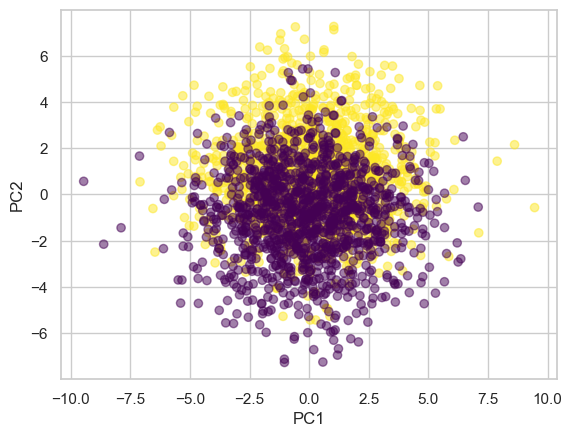

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming X_pca is a 2D array of shape (n_samples, n_components)
# with the first two principal components being in columns 0 and 1
x = X_train_scaled_pca[:, 0]
y = X_train_scaled_pca[:, 1]
plt.scatter(x, y, c=y_train, cmap='viridis', alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

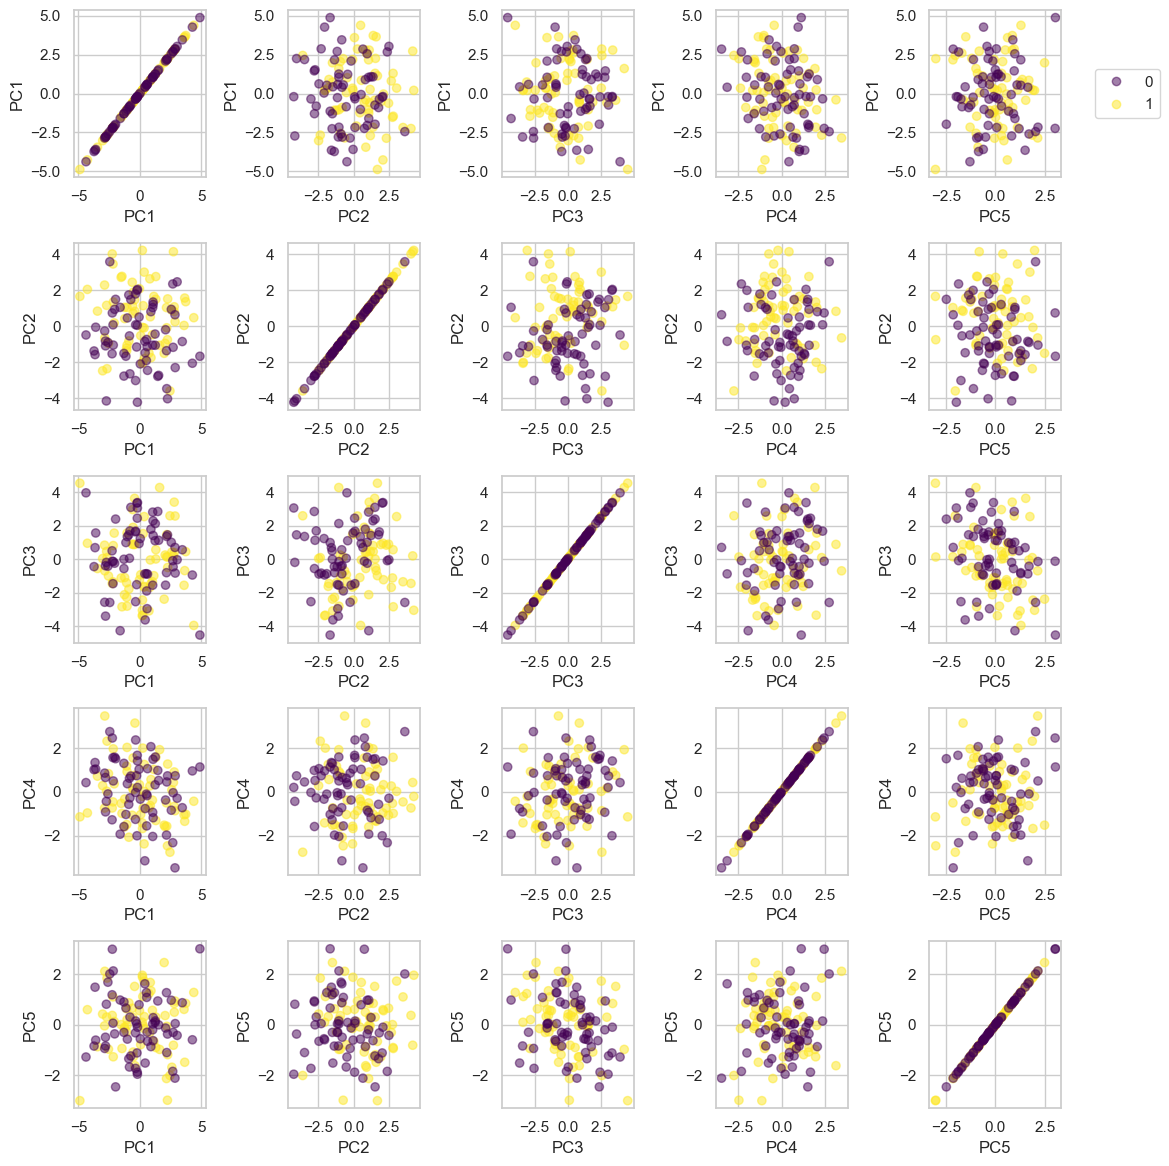

In [21]:
# Assuming X_train is a 2D array of shape (n_samples, n_features)
X_train2 = X_train_scaled_pca

# Instantiate a PCA object with n_components=5
pca = PCA(n_components=5)

# Fit the PCA model to the data and transform it
X_train_scaled_pca2 = pca.fit_transform(X_train2)

n_components = X_train_scaled_pca2.shape[1]
fig, axs = plt.subplots(n_components, n_components, figsize=(12, 12))
for i in range(n_components):
    for j in range(n_components):
        ax = axs[i, j]
        if i == j:
            scatter = ax.scatter(X_test_scaled_pca[:, j], X_test_scaled_pca[:, i], 
                       c=y_test, cmap='viridis', alpha=0.5)
            ax.set_xlabel('PC{}'.format(j+1))
            ax.set_ylabel('PC{}'.format(i+1))
        elif j < i:
            scatter = ax.scatter(X_test_scaled_pca[:, j], X_test_scaled_pca[:, i], c=y_test, 
                       cmap='viridis', alpha=0.5)
            ax.set_xlabel('PC{}'.format(j+1))
            ax.set_ylabel('PC{}'.format(i+1))
        else:
            scatter = ax.scatter(X_test_scaled_pca[:, j], X_test_scaled_pca[:, i], c=y_test, cmap='viridis', alpha=0.5)
            ax.set_xlabel('PC{}'.format(j+1))
            ax.set_ylabel('PC{}'.format(i+1))
        if i == 0 and j == n_components-1:
            handles, labels = scatter.legend_elements()
            legend = ax.legend(handles, labels, loc='center', bbox_to_anchor=(1.5, 0.5))
            fig.suptitle(legend.get_label(), fontsize=25)

    for k in range(i+1, n_components):
        axs[k, i].axis('on') # don't show redundant plots
        
fig.tight_layout()
plt.show()


In [22]:
from sklearn.ensemble import RandomForestClassifier 

model = RandomForestClassifier(random_state=1)
model = model.fit(X_train_scaled_pca,y_train)
model.score(X_test_scaled_pca,y_test)

0.6984126984126984

In [23]:
from sklearn.ensemble import RandomForestClassifier 

model = RandomForestClassifier(random_state=1)
model = model.fit(X_train,y_train)
model.score(X_test,y_test)

0.626984126984127